In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_df = pd.read_csv("D://Loan_Default.csv")


In [3]:
loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
    total_units = loan_df["total_units"].map({
        "1U": "1U",
        "2U": "2U+",
        "3U": "2U+",
        "4U": "2U+"}),
    loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [4]:
prep_loan_df = loan_df.drop([
    "year", 
     "ID", 
     "open_credit", 
    "construction_type", 
    "Security_Type", 
    "Secured_by"], 
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           148670 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [6]:
from sklearn.model_selection import train_test_split

features = [
    "loan_amount", 
    "income", 
    "Gender",
    "rate_of_interest",
    "age",
    "lump_sum_payment",
    "credit_type",
    "total_units",
    "Credit_Worthiness",
    "Credit_Score",
    "approv_in_adv", 

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)


In [7]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8525929911885384

In [27]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
accuracy_score(y_test, lr.predict(X_test))

0.8525929911885384

In [13]:
confusion_matrix(y_test, lr.predict(X_test))

array([[22214,   131],
       [ 4252,  3137]], dtype=int64)

In [14]:
precision_score(y_test, lr.predict(X_test))

0.9599143206854345

In [15]:
recall_score(y_test, lr.predict(X_test))
# we are missing on a lot of defauted loans

0.42455000676681554

In [29]:
f1_score(y_test, lr.predict(X_test))

0.5887210284320165

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [23]:
logreg = LogisticRegression(C=.6, penalty="l1", solver="saga", max_iter=1000)
lr_reg = logreg.fit(X_train_std, y_train) 

print(f"Train Accuracy:{lr_reg.score(X_train_std, y_train)}")
print(f"Test Accuracy:{lr_reg.score(X_test_std, y_test)}")

Train Accuracy:0.8607654536893792
Test Accuracy:0.8621443465393153


In [24]:
confusion_matrix(y_test, lr_reg.predict(X_test_std))

array([[22207,   138],
       [ 3961,  3428]], dtype=int64)

In [25]:
precision_score(y_test, lr_reg.predict(X_test_std))

0.9613011777902412

In [26]:
recall_score(y_test, lr_reg.predict(X_test_std))

0.46393287318987686

In [30]:
f1_score(y_test, lr_reg.predict(X_test_std))

0.6258329529895025

In [41]:
confusion_matrix(y_test,lr_reg.predict_proba(X_test_std)[:,1] > .1)

array([[ 3275, 19070],
       [  311,  7078]], dtype=int64)

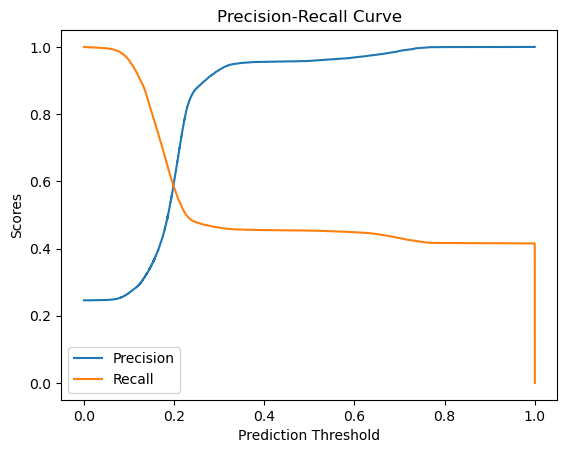

In [43]:
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr_reg.predict_proba(X_train_std) [:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend( )
plt.title('Precision-Recall Curve')
plt.show()

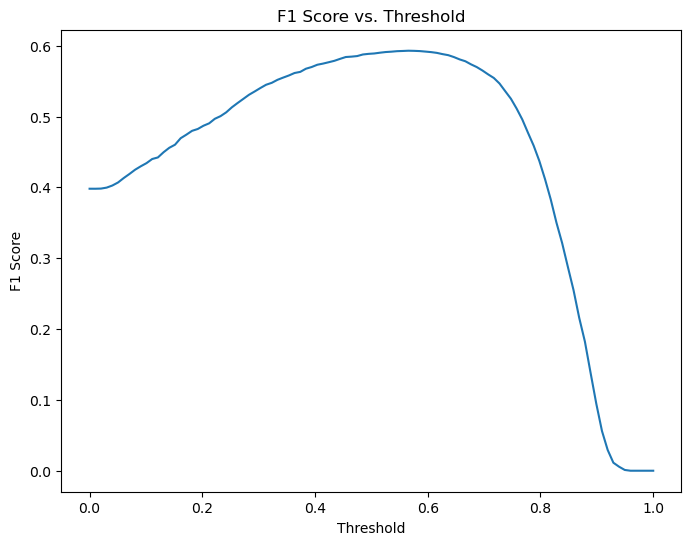

In [44]:
y_probs = lr.predict_proba(X_test)[:,1]
thresholds = np. linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_probs >= threshold)) for threshold in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel( 'Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold') 
plt.show()

In [ ]:
# Precision vs Recall (.7)

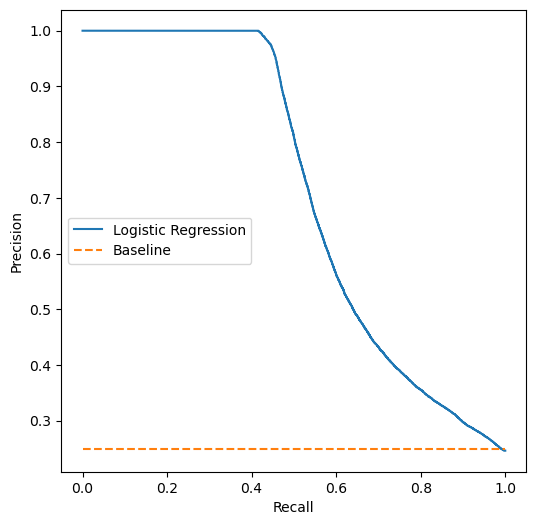

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(r_curve, p_curve, label="Logistic Regression")
baseline = len(y_test[y_test==1])/ len(y_test)
ax.plot([0,1],[baseline,baseline], linestyle="--", label="Baseline")
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left')

<AxesSubplot:>

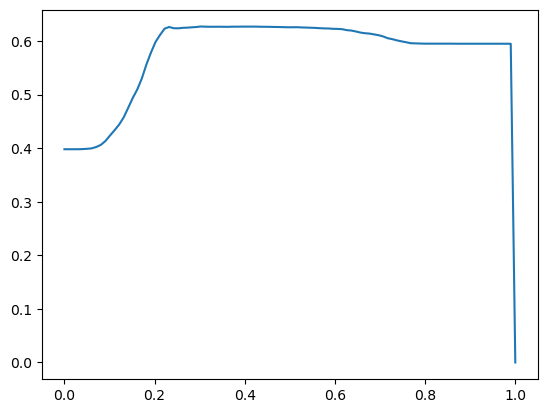

In [49]:
#F1 Curve
#using the default threshold of .5


f1 = []

thresholds = np.linspace(0,1,100)

for thresh in thresholds:
    y_pred = (lr_reg.predict_proba(X_test_std)[:,1]>thresh)
    f1.append(f1_score(y_test, y_pred))
    
sns.lineplot(x=thresholds, y=f1)


In [50]:
f1


[0.39808205155833315,
 0.3980163863734368,
 0.3980367833450192,
 0.3980456729471468,
 0.39833464002811647,
 0.3988506681846521,
 0.399662226580589,
 0.4022672243011226,
 0.4061948637522054,
 0.41329263376144676,
 0.4234941564279292,
 0.4333437793795048,
 0.44382893131532963,
 0.45720324057766826,
 0.47517486526774455,
 0.4935942911989316,
 0.5096290848922185,
 0.5301192590713016,
 0.5559854346836596,
 0.5782887632598616,
 0.5981635943085442,
 0.6113997555012224,
 0.6231434633589032,
 0.6262078318359044,
 0.6239264335907001,
 0.623784068004557,
 0.6246580178271998,
 0.624988899742474,
 0.6256364448414471,
 0.626200951782347,
 0.6271783295711061,
 0.6267548229327053,
 0.6266436927541489,
 0.6266460811915358,
 0.62671637719378,
 0.6266047527997816,
 0.626525778830388,
 0.626811264011665,
 0.626811264011665,
 0.6269255309452193,
 0.6269255309452193,
 0.6269255309452193,
 0.6269255309452193,
 0.6266751754945756,
 0.6266070940093006,
 0.6264818530001824,
 0.6262884247012679,
 0.6261631089217

In [51]:
#ROC  = Visualizes model performance for all thresholds
# Summarize ROC using AUC, measures the probability that a randomly selected positive class has a higher predicted probability 
#then a negative class 

#1 perfect classifier
#0 perfect incorrect classifier
#.5 our model is no better than a random guess


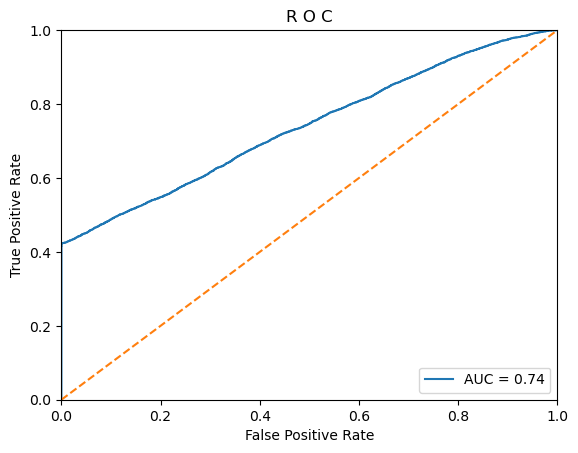

In [54]:
from sklearn.metrics import auc, roc_curve

#claculate the tpr and fpr for all thresholds of the classification
probs = lr.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.title("R O C")
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], '--', label="Random Guess")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
pd.DataFrame({"TPR":tpr, "FPR":fpr, "Threshold":threshold}).round(5)

,TPR,FPR,Threshold
0,0.00000,0.00000,1.95664
1,0.00014,0.00000,0.95664
2,0.40060,0.00000,0.68144
3,0.40060,0.00004,0.68134
4,0.41115,0.00004,0.65190
...,...,...,...
7064,0.99973,0.99973,0.01017
7065,0.99973,0.99991,0.00520
7066,0.99986,0.99991,0.00306
7067,0.99986,1.00000,0.00003
